In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Download S&P 500 data from Yahoo Finance
sp500_data = yf.download('^GSPC', start='2010-01-01', end='2024-09-10')

# Show the first few rows
sp500_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2024-09-03,5623.890137,5623.890137,5504.330078,5528.930176,5528.930176,3866350000
2024-09-04,5506.680176,5552.990234,5503.660156,5520.069824,5520.069824,3478140000
2024-09-05,5520.080078,5546.299805,5480.540039,5503.410156,5503.410156,3521650000


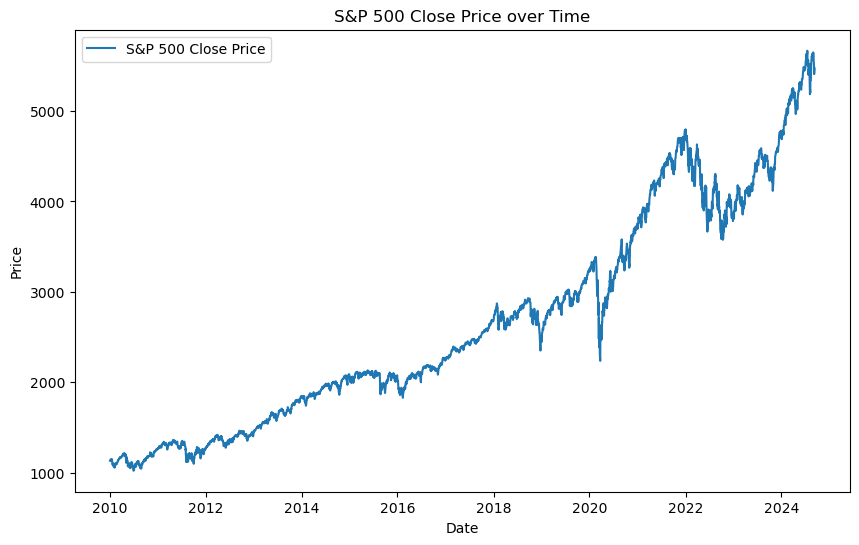

In [3]:
plt.figure(figsize=(10,6))
plt.plot(sp500_data['Close'], label='S&P 500 Close Price')
plt.title('S&P 500 Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

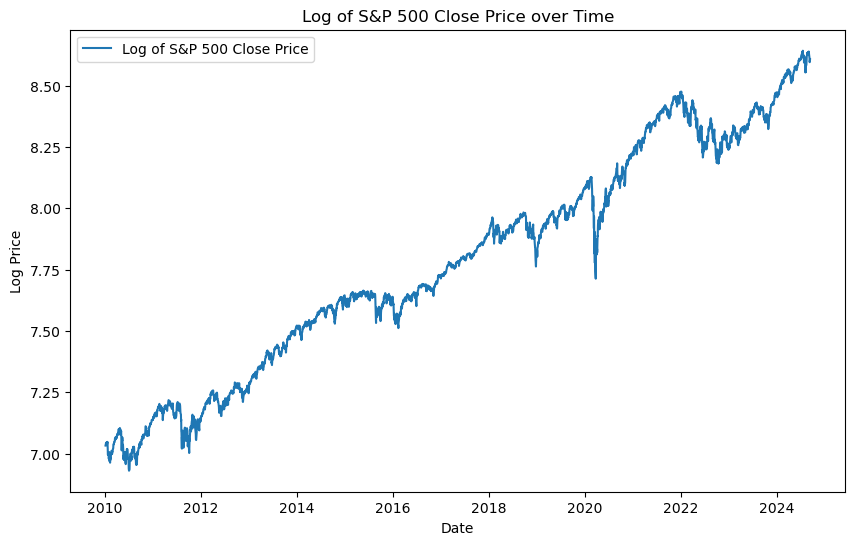

In [4]:
sp500_data['Log_Close'] = np.log(sp500_data['Close'])
plt.figure(figsize=(10,6))
plt.plot(sp500_data['Log_Close'], label='Log of S&P 500 Close Price')
plt.title('Log of S&P 500 Close Price over Time')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()
plt.show()

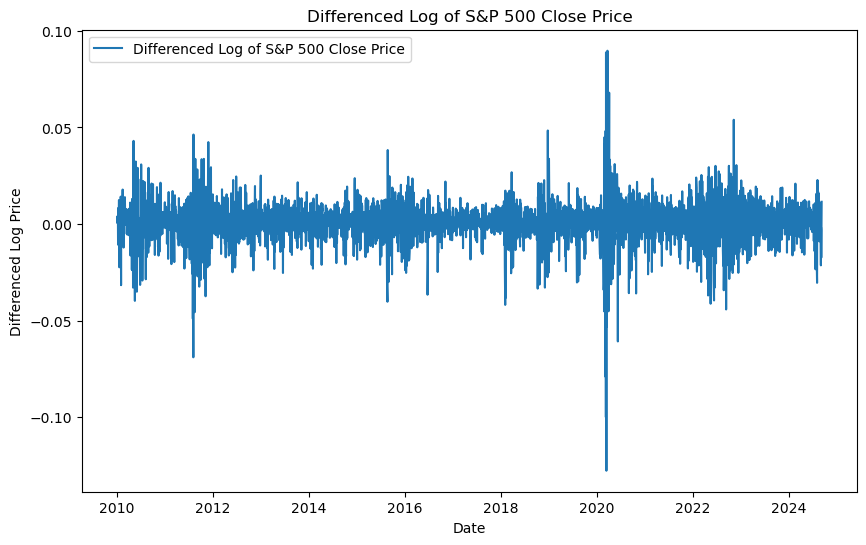

In [5]:
sp500_data['Diff_Close'] = sp500_data['Log_Close'].diff().dropna()

plt.figure(figsize=(10,6))
plt.plot(sp500_data['Diff_Close'], label='Differenced Log of S&P 500 Close Price')
plt.title('Differenced Log of S&P 500 Close Price')
plt.xlabel('Date')
plt.ylabel('Differenced Log Price')
plt.legend()
plt.show()

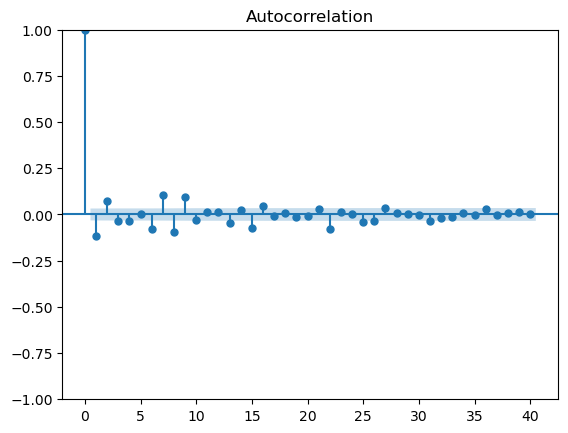

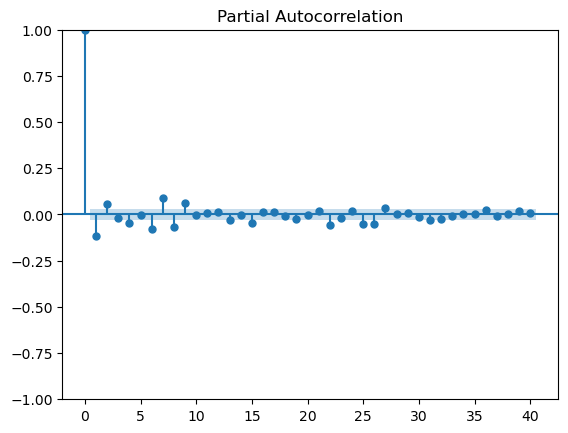

In [6]:
plot_acf(sp500_data['Diff_Close'].dropna(), lags=40)
plot_pacf(sp500_data['Diff_Close'].dropna(), lags=40)
plt.show()

In [7]:
# Fit ARIMA model (p,d,q) where d = 1 due to differencing
model = ARIMA(sp500_data['Log_Close'], order=(50, 1, 25)) # cantidad de cierres anteriores, 
results = model.fit()

# Summary of the model
print(results.summary())

forecast_steps = 60  # Number of days to forecast
forecast = results.get_forecast(steps=forecast_steps)

# Extract forecasted mean and confidence intervals
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()


/Users/carlosoliver/miniconda3/envs/env_sp500/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlosoliver/miniconda3/envs/env_sp500/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlosoliver/miniconda3/envs/env_sp500/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/carlosoliver/miniconda3/envs/env_sp500/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary

                               SARIMAX Results                                
Dep. Variable:              Log_Close   No. Observations:                 3695
Model:               ARIMA(50, 1, 25)   Log Likelihood               11554.747
Date:                Fri, 20 Sep 2024   AIC                         -22957.495
Time:                        09:18:13   BIC                         -22485.196
Sample:                             0   HQIC                        -22789.399
                               - 3695                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0360     10.925     -0.003      0.997     -21.448      21.376
ar.L2          0.0244      7.577      0.003      0.997     -14.826      14.875
ar.L3         -0.0127      3.085     -0.004      0.9

/Users/carlosoliver/miniconda3/envs/env_sp500/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/carlosoliver/miniconda3/envs/env_sp500/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [8]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Generar las fechas para los próximos 30 días a partir de la última fecha en los datos históricos
last_date = sp500_data.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_steps+1, freq='B')[1:]  # +1 para incluir la última fecha, 'B' es para días laborales

# Asignar las fechas generadas al forecast_mean
forecast_mean.index = future_dates
conf_int.index = future_dates

# Crear una figura de plotly
fig = go.Figure()

# Graficar los datos históricos del S&P 500
fig.add_trace(go.Scatter(
    x=sp500_data.index, 
    y=sp500_data['Close'], 
    mode='lines', 
    name='Histórico S&P 500',
    line=dict(color='blue')
))

# Graficar las predicciones del S&P 500 para los próximos 30 días
fig.add_trace(go.Scatter(
    x=forecast_mean.index, 
    y=np.exp(forecast_mean),  # Deshacer la transformación logarítmica
    mode='lines', 
    name='Predicción S&P 500 2024',
    line=dict(color='red')
))

# Graficar el intervalo de confianza
fig.add_trace(go.Scatter(
    x=list(forecast_mean.index) + list(forecast_mean.index[::-1]),  # Crear el eje x para el área de confianza
    y=list(np.exp(conf_int.iloc[:, 0])) + list(np.exp(conf_int.iloc[:, 1])[::-1]),  # Límites inferior y superior
    fill='toself',
    fillcolor='rgba(255,182,193,0.3)',  # Color rosado claro
    line=dict(color='rgba(255,182,193,0)'),  # Sin línea para el área
    hoverinfo="skip",
    showlegend=False
))

# Ajustar el layout
fig.update_layout(
    title="Predicción del S&P 500 para los próximos 60 días",
    xaxis_title="Fecha",
    yaxis_title="Precio del S&P 500",
    legend=dict(x=0, y=1, traceorder="normal"),
    hovermode="x unified",
    template="plotly_white"  # Tema limpio opcional
)

# Mostrar la gráfica
fig.show()

In [14]:
#pip install numpy==1.21.0 pmdarima==1.8.0

  Using cached numpy-1.21.0-cp310-cp310-macosx_14_0_arm64.whl
  Using cached pmdarima-1.8.0.tar.gz (1.0 MB)
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.17-py2.py3-none-any.whl.metadata (2.6 kB)
INFO: pip is looking at multiple versions of pandas to determine which version is compatible with other requirements. This could take a while.
  Using cached pandas-2.2.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached pandas-2.2.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (19 kB)
  Using cached pandas-2.1.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (18 kB)
  Using cached pandas-2.1.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (18 kB)
  Using cached pandas-2.1.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (18 kB)
  Using cached pandas-2.1.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (18 kB)
  Using cached pandas-2.1.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (18 kB)
INFO: pip is still looking at multiple versions of pandas to determine which version i

In [4]:
pip install scikit-learn==0.24.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 9.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [34 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      <string>:116: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distuti

In [5]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/Users/carlosoliver/miniconda3/envs/env_sp500/lib/python3.10/site-packages/sklearn/utils/metaestimators.py)

In [ ]:

# Extraer la serie temporal de precios de cierre
y = sp500_data['Close']
y


In [13]:
sp500_data.index 

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2024-08-26', '2024-08-27', '2024-08-28', '2024-08-29',
               '2024-08-30', '2024-09-03', '2024-09-04', '2024-09-05',
               '2024-09-06', '2024-09-09'],
              dtype='datetime64[ns]', name='Date', length=3695, freq=None)

In [ ]:

# Usar auto_arima para encontrar el mejor modelo ARIMA
model = auto_arima(y, seasonal=False, trace=True,
                    error_action='ignore', suppress_warnings=True,
                    stepwise=True)

# Mostrar el resumen del modelo encontrado
print(model.summary())

# Hacer predicciones para los próximos 12 períodos (por ejemplo, 12 días)
forecast, conf_int = model.predict(n_periods=12, return_conf_int=True)

# Crear un índice de fechas para las predicciones
forecast_index = pd.date_range(start=y.index[-1] + pd.DateOffset(days=1), periods=12, freq='B')

# Crear un DataFrame para las predicciones
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Predicción'])
forecast_df['Conf_Int_Lower'] = conf_int[:, 0]
forecast_df['Conf_Int_Upper'] = conf_int[:, 1]

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(y, label='Precio de Cierre Observado')
plt.plot(forecast_df.index, forecast_df['Predicción'], color='red', label='Predicción')
plt.fill_between(forecast_df.index, forecast_df['Conf_Int_Lower'], forecast_df['Conf_Int_Upper'], color='red', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Predicción de Precios de Cierre del S&P 500 con auto_arima')
plt.legend()
plt.show()